<a href="https://colab.research.google.com/github/RMV123/Finclub_project/blob/main/submission_23115125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Datasets_final.zip to Datasets_final.zip


In [ ]:
import zipfile

with zipfile.ZipFile("Datasets_final.zip", "r") as zip_ref:
    zip_ref.extractall("datasets")

In [ ]:
import os
os.listdir("datasets")

['validate_dataset_final.csv', 'train_dataset_final1.csv']

In [ ]:
import pandas as pd

train_df = pd.read_csv("datasets/train_dataset_final1.csv")
val_df = pd.read_csv("datasets/validate_dataset_final.csv")

print(train_df.shape)
print(val_df.shape)
train_df.head()


(25247, 27)
(5016, 26)


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [ ]:
print(train_df.info())
print(train_df.isnull().sum())
print(train_df['next_month_default'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

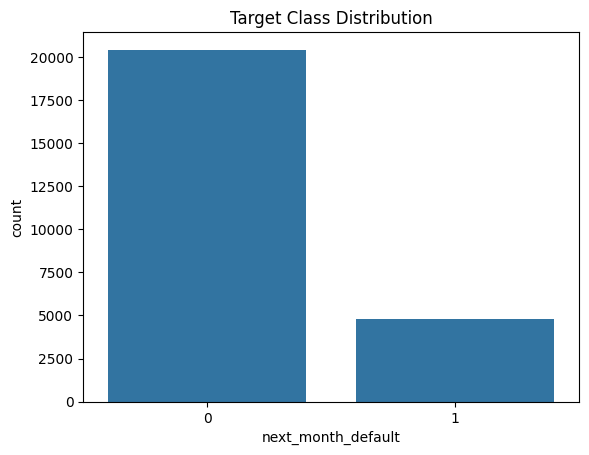

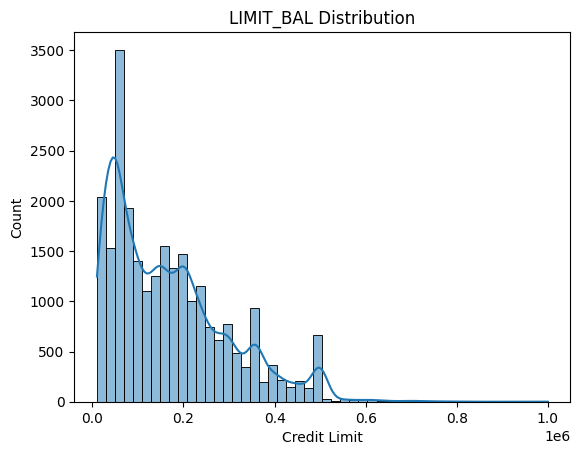

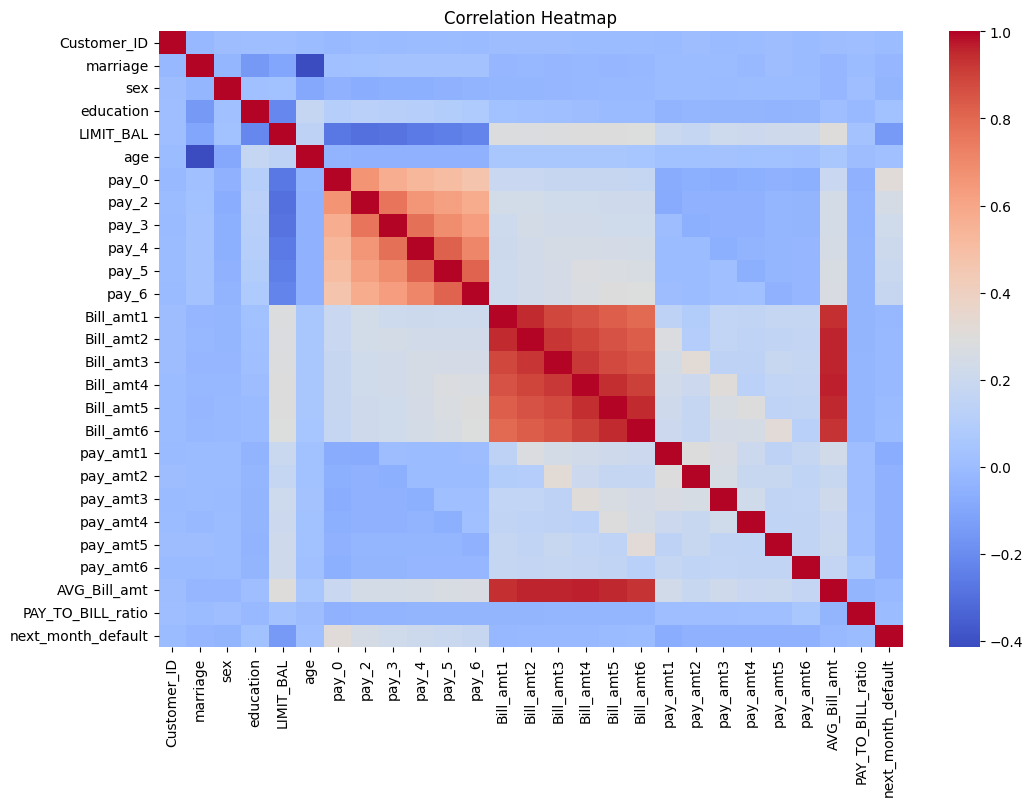

Missing values:
 Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64
Duplicate rows: 0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target class distribution
sns.countplot(x='next_month_default', data=train_df)
plt.title("Target Class Distribution")
plt.show()

# Credit Limit Distribution
sns.histplot(train_df['LIMIT_BAL'], bins=50, kde=True)
plt.title("LIMIT_BAL Distribution")
plt.xlabel("Credit Limit")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Check missing values and duplicates
print("Missing values:\n", train_df.isnull().sum())
print("Duplicate rows:", train_df.duplicated().sum())



In [ ]:
train_df = train_df.drop_duplicates()

train_df = train_df.fillna(train_df.median())
val_df = val_df.fillna(val_df.median())

train_df = train_df.drop(columns=['Customer_ID'])
val_df = val_df.drop(columns=['Customer_ID'])


In [ ]:
train_df['credit_utilization'] = train_df['AVG_Bill_amt'] / train_df['LIMIT_BAL']
val_df['credit_utilization'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']

pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
train_df['delinquency_streak'] = train_df[pay_cols].apply(lambda x: sum(x >= 1), axis=1)
val_df['delinquency_streak'] = val_df[pay_cols].apply(lambda x: sum(x >= 1), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['next_month_default'])
y = train_df['next_month_default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
print("Balanced class distribution:", Counter(y_train_bal))

Balanced class distribution: Counter({0: 16352, 1: 16352})


In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4415
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4088
           1       0.57      0.40      0.47       962

    accuracy                           0.83      5050
   macro avg       0.72      0.66      0.68      5050
weighted avg       0.81      0.83      0.82      5050

ROC AUC Score: 0.7643207287899069


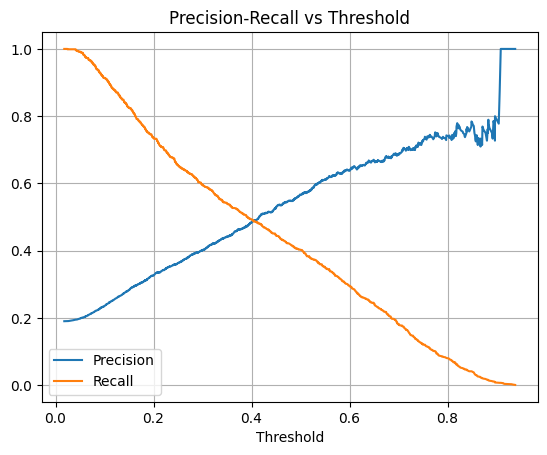

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4088
           1       0.40      0.60      0.48       962

    accuracy                           0.75      5050
   macro avg       0.65      0.69      0.66      5050
weighted avg       0.80      0.75      0.77      5050



In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

threshold = 0.3
y_pred_thresh = (y_proba > threshold).astype(int)
print(classification_report(y_test, y_pred_thresh))

In [ ]:
val_df['credit_utilization'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']
val_df['delinquency_streak'] = val_df[pay_cols].apply(lambda x: sum(x >= 1), axis=1)

X_val = val_df.copy()
val_proba = model.predict_proba(X_val)[:, 1]
val_pred = (val_proba > threshold).astype(int)

raw_val = pd.read_csv("datasets/validate_dataset_final.csv")
submission = pd.DataFrame({
    'Customer_ID': raw_val['Customer_ID'],
    'next_month_default': val_pred
})
submission.to_csv("lgbm_prediction.csv", index=False)

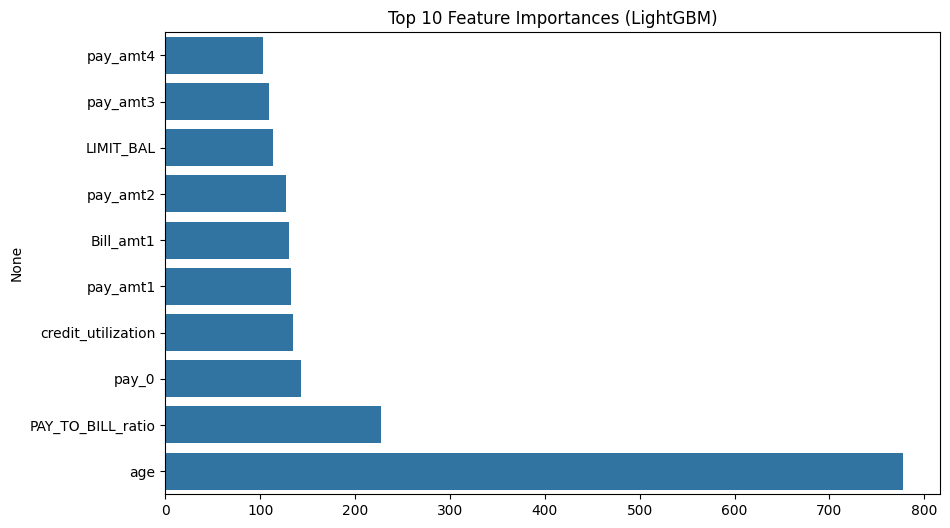

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

importances = model.feature_importances_
top_idx = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top_idx], y=X.columns[top_idx])
plt.title("Top 10 Feature Importances (LightGBM)")
plt.show()


In [ ]:
# Re-read the file
import pandas as pd

df = pd.read_csv("lgbm_prediction.csv")
num_ones = df['next_month_default'].sum()

print(f"Number of predicted defaults (1s): {num_ones}")

Number of predicted defaults (1s): 1472
